# Test Model on Important Cases.

In [1]:
import numpy as np
np.random.seed(4917)
from keras.models import Model,load_model
from output.Test_Functions import log_progress
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline
#from test_environments import Environment1, Environment2, Environment3,Environment4,Environment5
from time import time
from Settings import *
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
#Environment={1:Environment1,2:Environment2,3:Environment3,4:Environment4,5:Environment5}
#Direction={1:'E',2:'E',3:'E',4:'E',5:'E'}
##### IMPORTANT SELECT WHICH ENVIRONMENT YOU WANT TO TEST FROM HERE
from Environments import CreateEnvironment

#for env in log_progress(sequence=range(1,17),every=1,name='Drawing Environment'):
def SaveImages(preferences,name):
    seq = list(preferences.keys())#range(1,17+5) #[7,11,12,13,14,15]
    seq = sort(seq)
    count= len(seq)
    counter=1
    fig = plt.figure(figsize=(13,count*3.5))
    Firstpass=True
    for env in log_progress(sequence=seq,every=1,name='Drawing Environment'):
    #     print(env,counter, counter+1,counter+2)
        preferences[env]['mesg']=preferences[env]['mesg'].format(env)
        game = CreateEnvironment(preferences[env])
        ax = plt.subplot(count,3,counter)
        if Firstpass:
            ax.set_title('Full map',fontweight='bold')
        ax.set_ylabel(preferences[env]['mesg'],fontweight='bold')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.imshow(game.BuildImage())
        DAgent,AIAgent = [game.agents[x] for x in game.agents]
        game.Step()
        ax = plt.subplot(count,3,counter+1)
        if Firstpass:
            ax.set_title('AI Vision',fontweight='bold')
            
        ax.imshow(game.AgentViewPoint(AIAgent.ID))    
        ax = plt.subplot(count,3,counter+2)
        if Firstpass:
            ax.set_title('Dom Vision',fontweight='bold')
            Firstpass=False
        ax.imshow(game.AgentViewPoint(DAgent.ID))
        counter+=3
    plt.tight_layout()
    
    plt.savefig('{}.jpg'.format(name))

Using Theano backend.


<img src="./envs.png"></img>

In [11]:
msgs=[',should go',',should not go']
msg='Env:{}'
preferences={
    1:{'sub':(1,1),'dom':(1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    2:{'sub':(1,1),'dom':(7,4),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
    3:{'sub':(1,1),'dom':(10,0),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
    4:{'sub':(1,1),'dom':(9,9),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    5:{'sub':(1,1),'dom':(1,9),'food':(2,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' explore'},
    6:{'sub':(1,1),'dom':(1,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' analyze the results'},
    7:{'sub':(1,1),'dom':(3,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+' surprise me'},
    8:{'sub':(1,1),'dom':(9,7),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    9:{'sub':(1,1),'dom':(1,9),'food':(2,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]},
    10:{'sub':(1,1),'dom':(1,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]},
    11:{'sub':(9,1),'dom':(7,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+' race'},
    12:{'sub':(1,1),'dom':(1,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+' SM'}
}

msgs=[',should go',',should not go']
msg='Env:{}'
preferences={
    1:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    2:{'sub':(2,1),'dom':(7,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
    3:{'sub':(2,1),'dom':(10,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
    4:{'sub':(2,1),'dom':(9,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    5:{'sub':(2,1),'dom':(2,9),'food':(3,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' explore'},
    6:{'sub':(2,1),'dom':(2,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' analyze the results'},
    #7:{'sub':(1,1),'dom':(1,9),'food':(6,5),'obs':(2,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' Replicated'},
    7:{'sub':(2,1),'dom':(4,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+' surprise me'},
    8:{'sub':(2,1),'dom':(9,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    9:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]},
    10:{'sub':(2,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]},
    11:{'sub':(9,1),'dom':(7,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+' race'},
    12:{'sub':(2,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+' SM'}
    #,14:{'sub':(1,1),'dom':(1,9),'food':(2,4),'obs':(2,5),'subdir':'E','domdir':'W','mesg':msg+'Not Used'}
            }

msgs=[',should go',',should not go']
msg='Env:{}'
preferences={
    1:{'sub':(1,1),'dom':(1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    2:{'sub':(1,1),'dom':(7,4),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
    3:{'sub':(1,1),'dom':(10,0),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
    4:{'sub':(1,1),'dom':(9,9),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    5:{'sub':(1,1),'dom':(1,9),'food':(2,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' explore'},
    6:{'sub':(1,1),'dom':(1,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' analyze the results'},
    7:{'sub':(1,1),'dom':(3,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+' surprise me'},
    8:{'sub':(1,1),'dom':(9,7),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    9:{'sub':(1,1),'dom':(1,9),'food':(2,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]},
    10:{'sub':(1,1),'dom':(1,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]},
    11:{'sub':(9,1),'dom':(7,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+' race'},
    12:{'sub':(1,1),'dom':(1,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+' SM'}
}

In [3]:
msgs=[',should go',',should not go']
msg='Env:{}'
preferences={
    1:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    2:{'sub':(2,1),'dom':(7,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
    3:{'sub':(2,1),'dom':(10,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
    4:{'sub':(2,1),'dom':(9,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    5:{'sub':(2,1),'dom':(2,9),'food':(3,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' explore'},
    6:{'sub':(2,1),'dom':(2,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' analyze the results'},
    7:{'sub':(2,1),'dom':(4,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+' surprise me'},
    8:{'sub':(2,1),'dom':(9,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    9:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]},
    10:{'sub':(2,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]},
    11:{'sub':(9,1),'dom':(7,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+' race'},
    12:{'sub':(2,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+' SM'},
    13:{'sub':(2,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+' SM'}
}

In [5]:
msgs=[',should go',',should not go']
msg='Env:{}'
preferences={
1:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
2:{'sub':(2,1),'dom':(7,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
3:{'sub':(2,1),'dom':(10,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
4:{'sub':(2,1),'dom':(9,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
5:{'sub':(2,1),'dom':(2,9),'food':(3,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' explore'},
6:{'sub':(2,1),'dom':(2,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' analyze the results'},
7:{'sub':(2,1),'dom':(4,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+' surprise me'},
8:{'sub':(2,1),'dom':(9,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
9:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]},
10:{'sub':(2,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]},
11:{'sub':(9,1),'dom':(7,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+' race'},
12:{'sub':(2,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+' SM'},
13:{'sub':(2,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+' SM'},
14:{'sub':(3,1),'dom':(3,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+' SM'},
15:{'sub':(3,1),'dom':(3,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+' SM'},
16:{'sub':(2,1),'dom':(2,9),'food':(1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]}
        }

In [2]:
msgs=[',should go',',should not go']
msg='Env:{}'
preferences={
#Group 1 (Dominant positions) Original
1:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
2:{'sub':(2,1),'dom':(7,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
3:{'sub':(2,1),'dom':(10,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
4:{'sub':(2,1),'dom':(9,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
8:{'sub':(2,1),'dom':(9,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},

#Group 1-1 shifting all elements.
101:{'sub':(2+1,1),'dom':(2+1,9),'food':(3+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
102:{'sub':(2+1,1),'dom':(7+1,4),'food':(3+1,4),'obs':(3+1,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_eat'},
103:{'sub':(2-1,1),'dom':(10-1,0),'food':(3-1,4),'obs':(3+1,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
104:{'sub':(2+1,1),'dom':(9+1,9),'food':(3+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
108:{'sub':(2+1,1),'dom':(9+1,7),'food':(3+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
    
#Group 1-2 shifting only dominant when is observable.
201:{'sub':(2,1),'dom':(2+1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
202:{'sub':(2,1),'dom':(7+1,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
203:{'sub':(2,1),'dom':(10-1,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
204:{'sub':(2,1),'dom':(9+1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
208:{'sub':(2,1),'dom':(9+1,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
    
#Group 1-3 shifting subordinate only.
301:{'sub':(2+1,1),'dom':(2,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
302:{'sub':(2+1,1),'dom':(7,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
303:{'sub':(2+1,1),'dom':(10,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
304:{'sub':(2+1,1),'dom':(9,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
308:{'sub':(2+1,1),'dom':(9,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
    
#Group 1-4 shifting only food.
401:{'sub':(2,1),'dom':(2,9),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
402:{'sub':(2,1),'dom':(7,4),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
403:{'sub':(2,1),'dom':(10,0),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
404:{'sub':(2,1),'dom':(9,9),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
408:{'sub':(2,1),'dom':(9,7),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_eat'},

#Group 2 Food, Obstacle Positions.
5:{'sub':(2,1),'dom':(2,9),'food':(3,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
6:{'sub':(2,1),'dom':(2,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
9:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
10:{'sub':(2,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
16:{'sub':(2,1),'dom':(2,9),'food':(1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-1 shifting all elements.
105:{'sub':(2+1,1),'dom':(2+1,9),'food':(3+1,6),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
106:{'sub':(2+1,1),'dom':(2+1,9),'food':(6+1,5),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
109:{'sub':(2+1,1),'dom':(2+1,9),'food':(3+1,4),'obs':(7+1,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
110:{'sub':(2+1,1),'dom':(2+1,9),'food':(7+1,4),'obs':(7+1,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_avoid'},
116:{'sub':(2+1,1),'dom':(2+1,9),'food':(1+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-2 shifting only dominant when is observable.
205:{'sub':(2,1),'dom':(2+1,9),'food':(3,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
206:{'sub':(2,1),'dom':(2+1,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
209:{'sub':(2,1),'dom':(2+1,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
210:{'sub':(2,1),'dom':(2+1,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
216:{'sub':(2,1),'dom':(2+1,9),'food':(1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-3 shifting subordinate only.
305:{'sub':(2+1,1),'dom':(2,9),'food':(3,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
306:{'sub':(2+1,1),'dom':(2,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
309:{'sub':(2+1,1),'dom':(2,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
310:{'sub':(2+1,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
316:{'sub':(2+1,1),'dom':(2,9),'food':(1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-4 shifting only food.
405:{'sub':(2,1),'dom':(2,9),'food':(3+1,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
406:{'sub':(2,1),'dom':(2,9),'food':(6+1,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
409:{'sub':(2,1),'dom':(2,9),'food':(3+1,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
410:{'sub':(2,1),'dom':(2,9),'food':(7+1,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
416:{'sub':(2,1),'dom':(2,9),'food':(1+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 3 not in Training Examples.
7:{'sub':(2,1),'dom':(4,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+msgs[0]+'_N_avoid'},
11:{'sub':(9,1),'dom':(7,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]+'_N_avoid'},
12:{'sub':(2,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_eat'},
13:{'sub':(2,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
14:{'sub':(3,1),'dom':(3,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_avoid'},
15:{'sub':(3,1),'dom':(3,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
#Group 3-1 shifting all elements.
107:{'sub':(2+1,1),'dom':(4+1,1),'food':(6+1,5),'obs':(3+1,5),'subdir':'W','domdir':'W','mesg':msg+msgs[0]+'_N_eat'},
111:{'sub':(9+1,1),'dom':(7+1,1),'food':(8+1,10),'obs':(3+1,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]+'_N_avoid'},
112:{'sub':(2+1,1),'dom':(2+1,9),'food':(1+1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_avoid'},
113:{'sub':(2+1,1),'dom':(2+1,9),'food':(1+1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
114:{'sub':(3+1,1),'dom':(3+1,9),'food':(2+1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_avoid'},
115:{'sub':(3+1,1),'dom':(3+1,9),'food':(2+1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
#Group 3-2 shifting only dominant when is observable.
207:{'sub':(2,1),'dom':(4+1,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+msgs[0]+'_N_avoid'},
211:{'sub':(9,1),'dom':(7+1,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]+'_N_avoid'},
212:{'sub':(2,1),'dom':(2+1,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_eat'},
213:{'sub':(2,1),'dom':(2+1,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
214:{'sub':(3,1),'dom':(3+1,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_avoid'},
215:{'sub':(3,1),'dom':(3+1,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
#Group 3-3 shifting subordinate only.
307:{'sub':(2+1,1),'dom':(4,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+msgs[0]+'_N_avoid'},
311:{'sub':(9+1,1),'dom':(7,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]+'_N_avoid'},
312:{'sub':(2+1,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_avoid'},
313:{'sub':(2+1,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
314:{'sub':(3+1,1),'dom':(3,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_avoid'},
315:{'sub':(3+1,1),'dom':(3,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
#Group 3-4 shifting only food.
407:{'sub':(2,1),'dom':(4,1),'food':(6+1,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+msgs[0]+'_N_avoid'},
411:{'sub':(9,1),'dom':(7,1),'food':(8+1,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]+'_N_avoid'},
412:{'sub':(2,1),'dom':(2,9),'food':(1+1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_eat'},
413:{'sub':(2,1),'dom':(2,9),'food':(1+1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_eat'},
414:{'sub':(3,1),'dom':(3,9),'food':(2+1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_avoid'},
415:{'sub':(3,1),'dom':(3,9),'food':(2+1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'}
}

In [2]:
msgs=[',should go',',should not go']
msg='Env:{}'
preferences={
#Group 1 (Dominant positions) Original
18:{'sub':(2,1),'dom':(10,5),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
19:{'sub':(2,1),'dom':(8,6),'food':(4,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_N_eat'},


#Group 1-1 shifting all elements.
118:{'sub':(2+1,1),'dom':(10-1,5),'food':(3-1,4),'obs':(3-1,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
119:{'sub':(2+1,1),'dom':(8+1,6),'food':(4+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_N_eat'},

    
#Group 1-2 shifting only dominant when is observable.
218:{'sub':(2,1),'dom':(10-1,5),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
219:{'sub':(2,1),'dom':(8+1,6),'food':(4,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_N_eat'},
    
#Group 1-3 shifting subordinate only.
318:{'sub':(2+1,1),'dom':(10,5),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
319:{'sub':(2+1,1),'dom':(8,6),'food':(4,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_N_eat'},
    
#Group 1-4 shifting only food.
418:{'sub':(2,1),'dom':(10,5),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
419:{'sub':(2,1),'dom':(8,6),'food':(4+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_N_eat'},
}

VBox(children=(HTML(value=''), IntProgress(value=0, max=2)))

VBox(children=(HTML(value=''), IntProgress(value=0, max=2)))

VBox(children=(HTML(value=''), IntProgress(value=0, max=2)))

VBox(children=(HTML(value=''), IntProgress(value=0, max=2)))

VBox(children=(HTML(value=''), IntProgress(value=0, max=2)))

"\n    SaveImages(dict((k, preferences[k]) for k in (1+j,2+j,3+j,4+j,8+j)),'images_paper/Dom_Pos{}'.format(cat[j]))\n\n    SaveImages(dict((k, preferences[k]) for k in (5+j,6+j,9+j,10+j,16+j)),\n               'images_paper/Fod_obs{}'.format(cat[j]))\n    SaveImages(dict((k, preferences[k]) for k in (7+j,11+j,12+j,13+j,14+j,15+j)),\n               'images_paper/not_included{}'.format(cat[j]))\n\nSaveImages(dict((k, preferences[k]) for k in (101,102,103,104,108)),'images_paper/Dom_Pos_Allshft')\nSaveImages(dict((k, preferences[k]) for k in (201,202,203,204,208)),'images_paper/Dom_Pos_Domshft')\nSaveImages(dict((k, preferences[k]) for k in (301,302,303,304,308)),'images_paper/Dom_Pos_Subshft')\nSaveImages(dict((k, preferences[k]) for k in (401,402,403,404,408)),'images_paper/Dom_Pos_Foodshft')\n\n\n\n\nSaveImages(dict((k, preferences[k]) for k in (7,11,12,13,14,15)),'images_paper/not_included_Org')\nSaveImages(dict((k, preferences[k]) for k in (107,111,112,114,115)),'images_paper/not_inc

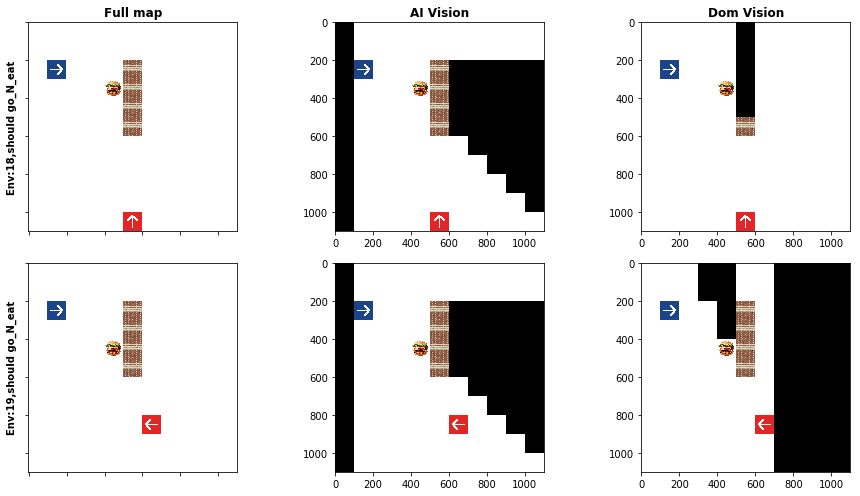

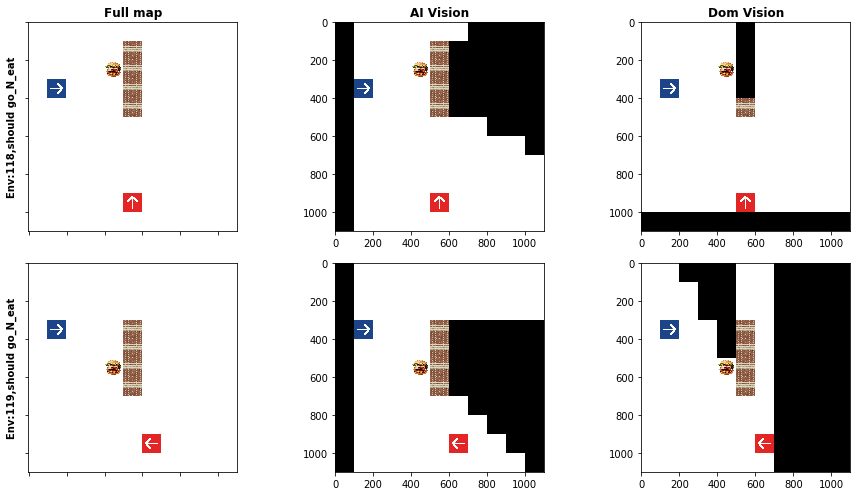

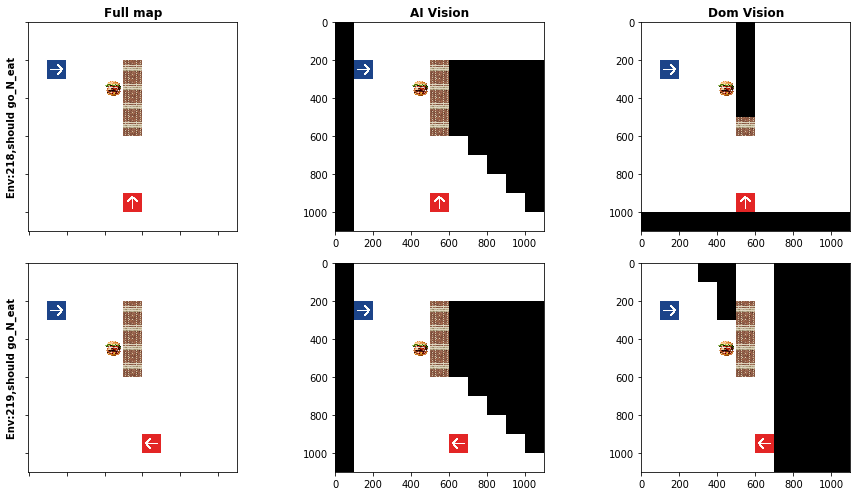

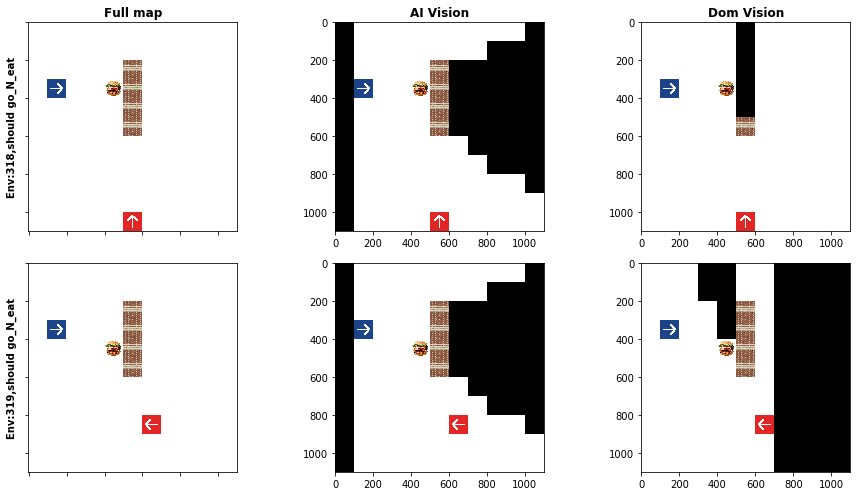

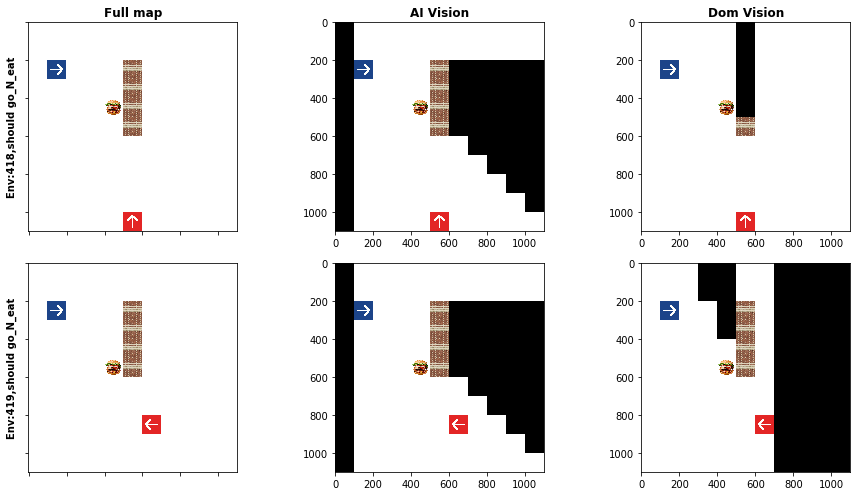

In [31]:
cat={0:'_Org',100:'_Allshft',200:'_Domshft',300:'_Subshft',400:'_Foodshft'}

for j in [0,100,200,300,400]:
    SaveImages(dict((k, preferences[k]) for k in (18+j,19+j)),'images_paper/Dom_Pos{}'.format(cat[j]))
'''
    SaveImages(dict((k, preferences[k]) for k in (1+j,2+j,3+j,4+j,8+j)),'images_paper/Dom_Pos{}'.format(cat[j]))

    SaveImages(dict((k, preferences[k]) for k in (5+j,6+j,9+j,10+j,16+j)),
               'images_paper/Fod_obs{}'.format(cat[j]))
    SaveImages(dict((k, preferences[k]) for k in (7+j,11+j,12+j,13+j,14+j,15+j)),
               'images_paper/not_included{}'.format(cat[j]))

SaveImages(dict((k, preferences[k]) for k in (101,102,103,104,108)),'images_paper/Dom_Pos_Allshft')
SaveImages(dict((k, preferences[k]) for k in (201,202,203,204,208)),'images_paper/Dom_Pos_Domshft')
SaveImages(dict((k, preferences[k]) for k in (301,302,303,304,308)),'images_paper/Dom_Pos_Subshft')
SaveImages(dict((k, preferences[k]) for k in (401,402,403,404,408)),'images_paper/Dom_Pos_Foodshft')




SaveImages(dict((k, preferences[k]) for k in (7,11,12,13,14,15)),'images_paper/not_included_Org')
SaveImages(dict((k, preferences[k]) for k in (107,111,112,114,115)),'images_paper/not_included_Allshft')
SaveImages(dict((k, preferences[k]) for k in (207,211,212,214,215)),'images_paper/not_included_Domshft')
SaveImages(dict((k, preferences[k]) for k in (307,311,312,314,315)),'images_paper/not_included_Subshft')
SaveImages(dict((k, preferences[k]) for k in (407,411,412,414,415)),'images_paper/not_included_Foodshft')
'''
#SaveImages(preferences,'images_paper/Dom_Pos_Org')

### Generate separate images. (GO TO IMAGES GENERATOR, THERE IS A GENERATOR THERE)

### Load the model

In [ ]:
train_m=target_m = 207
#model = load_model('cur_mod/{}/model.h5'.format(train_m))
model = load_model('output/{}/MOD/target_model.h5'.format(target_m))

In [ ]:
AIAgent,DAgent = [game.agents[x] for x in game.agents]

In [ ]:
ax = plt.subplot(1,1,1)
ax.imshow(game.BuildImage())

plt.figure(figsize=(13,5))
#AIAgent.NextAction=Settings.PossibleActions[3]
game.Step()
ax = plt.subplot(1,3,1)
ax.imshow(game.BuildImage())
ax = plt.subplot(1,2,2)
ax.imshow(game.AgentViewPoint(AIAgent.ID))
ax = plt.subplot(1,2,2)
ax.imshow(game.AgentViewPoint(DAgent.ID))

In [ ]:
def AddTextToImage(img,action,AgentView=0):
    img = np.array(img*255,dtype=np.uint8)
    img = Image.fromarray(img)
    #img = Image.fromarray(game.BuildImage())
    draw = ImageDraw.Draw(img)
    # font = ImageFont.truetype(<font-file>, <font-size>)
    font = ImageFont.truetype("LiberationSans-Bold.ttf", 12)
    # draw.text((x, y),"Sample Text",(r,g,b))
    if AgentView:
        draw.text((0, 0),"Action:{}".format(action),(255,0,0),font=font)
    else:
        draw.text((0, 0),"Action:{}".format(action),(0,0,0),font=font)
    return img

In [ ]:
print('Testing Target Model')
TestingCounter=0
TestingCounter+=1
writer = skvideo.io.FFmpegWriter("Final_Results/VID_ENV_{}_Test_{}.avi".format(env,TestingCounter))
writer2 = skvideo.io.FFmpegWriter("Final_Results/VID_ENV_{}_TestAG_{}.avi".format(env,TestingCounter))
#game.GenerateWorld()
img = game.BuildImage()
game.Step()
plt.imsave('Final_Results/VID_ENV_{}_Test_{}.png'.format(env,TestingCounter),img)
Start = time()
episode_reward=0
observation = AIAgent.Flateoutput()

writer.writeFrame(AddTextToImage(game.BuildImage(),AIAgent.NextAction,0))
writer2.writeFrame(AddTextToImage(game.AgentViewPoint(AIAgent.ID),AIAgent.NextAction,1))
for t in range(1000):
    s =np.array([observation])
    q = model.predict(s, batch_size=1)
    action = np.argmax(q[0])
    #print(Settings.PossibleActions[action],action)
    AIAgent.NextAction = Settings.PossibleActions[action]
    print(AIAgent.NextAction)
    if env not in [4,5]:
        DAgent.DetectAndAstar()
    #print(DAgent.NextAction)
    game.Step()
    observation = AIAgent.Flateoutput()
    reward = AIAgent.CurrentReward
    #print(reward)
    done = game.Terminated[0]
    #observation, reward, done, info = env.step(action)
    episode_reward += reward
    writer.writeFrame(AddTextToImage(game.BuildImage(),'{},TR:{}'.format(AIAgent.NextAction,episode_reward),0))
    writer2.writeFrame(AddTextToImage(game.AgentViewPoint(AIAgent.ID),'{},TR:{}'.format(AIAgent.NextAction,episode_reward),1))
    if done:
        break

writer.close()
writer2.close()
Start = time()-Start
print(t)